# Cleaning and analyzing Employee Quit Survey

This porject vonsist in analyse a survey from employees from the [Department of education, Training and Emplyment](https://en.wikipedia.org/wiki/Department_of_Education_(Queensland)) , and the Technical and Further Education, the DataSet for de DETE can be found [here](https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey) while the DataSet for the Tafe can be found here [Technical and Further Education](https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey).

The main purpose of this analysisis is to know if the employees who quit, quited because some kind of dissatisfaction?

Does the dissatisfaction is influenced by the Age of the employee?

These are the main questions, so lets begin.

In [1]:
#Import the libraries
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
dete_survey=pd.read_csv('dete_survey.csv')
tafe_survey=pd.read_csv('tafe_survey.csv')

In [4]:
print(dete_survey.info())
print(tafe_survey.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

Analysing the both datframes we can observe some things:

- Some columns in the dete_survey DataFrame contain values calles 'Not Stated', these values should be Nan values.
- Both DataFrames contain columns that we do not need for our analysis.
- Both dataFrames contain columns that says the same information, but their column names are different.

# Data Cleaning - Nan values and droping columns
Lets begin changing the `Not Stated` values to Nan values and the unneccesary columns.

In [3]:
dete_survey=pd.read_csv('dete_survey.csv',na_values='Not Stated')
#Now lets drop the unneccesary columns.

dete_survey=dete_survey.drop(dete_survey.columns[28:49],axis=1)

In [4]:
#Now lets drop the unneccesary columns for the tafe DataFrame
tafe_survey=tafe_survey.drop(tafe_survey.columns[17:66],axis=1)

In [5]:
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


# Changing column names

Changing thr names og the DataFrames to equal names is indispensable to paste them join them in the righ places. So lets start with this.

In [6]:
#A view of the column names for both DataFrames
print(tafe_survey.columns)
print(dete_survey.columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [7]:
#Change the column names in the dete_survey

#Save the columns in x
dete_survey_updated=dete_survey
x=dete_survey.columns

#Remove all the unnecesary characyers
x=x.str.lower().str.replace(' ','_').str.strip()

#Re asign column names
dete_survey_updated.columns=x
dete_survey_updated.head(3)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [8]:
#Now lets change the column names in the tafe_surveys columns

#Create a dictionary with the names to change
dic={'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

#Renaming the column names
tafe_survey_updated=tafe_survey.rename(dic,axis=1)
tafe_survey_updated.head(3)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
print(tafe_survey_updated['separationtype'].unique())
print(dete_survey_updated['separationtype'].unique())

['Contract Expired' 'Retirement' 'Resignation' 'Retrenchment/ Redundancy'
 'Termination' 'Transfer' nan]
['Ill Health Retirement' 'Voluntary Early Retirement (VER)'
 'Resignation-Other reasons' 'Age Retirement' 'Resignation-Other employer'
 'Resignation-Move overseas/interstate' 'Other' 'Contract Expired'
 'Termination']


In [10]:
print(tafe_survey_updated['separationtype'].value_counts())
print(dete_survey_updated['separationtype'].value_counts())

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64
Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64


## Filtering to reach objective

We di not have to forget the main objective of this porject, which is to answear the following question:

`Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?`

The key word here is `Resigning`, we have to filter all the rows by this in order to have the correct data for the analysis. We can find the type of separation in the `separationtype` column, which is the same for both DataFrames.

Reading the columns in the dete_survey_updated DataFrame, there are 3 types of `Resignation`, we have to get the 3 of them:

In [11]:
#Create a common pattern for the 3 types
pattern=r"Resignation-"

#Create a boolean Series
resignation=dete_survey_updated['separationtype'].str.contains(pattern,na=False)
#Filter by Resigning. 
dete_resignations=dete_survey_updated[resignation].copy()
#See if everything went good.
dete_resignations['separationtype'].value_counts()

Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Name: separationtype, dtype: int64

In [12]:
#lets do the same for the tafe_survey_updated DataFrame
tafe_resignation=tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()
#See if everything went good.
tafe_resignation['separationtype'].value_counts()

Resignation    340
Name: separationtype, dtype: int64

## Verifying Data

Before start cleaning the other data, it is important to verify inconsistencies.

Here we will focus on verifying that the years in the `cease_date` and `fete_start_date` columns make sense.

`cease_date` is the last years the person work, it would not make sence to have dates after the current time.

`dete_satrt_date` is the year when the person started to work. Most ot the people in this field start t work in thei 20's, in is unlikely that this colums have years before the year 1940.

Lets start with the `dete_resignation` DataFrame


In [13]:
#Check the unique values
dete_resignations['cease_date'].value_counts()
#Create the pattern to extract
p=r"([0-9]{4})"
#Extract the years
dete_resignations['cease_date']=dete_resignations['cease_date'].str.extract(p)
dete_resignations['cease_date']=dete_resignations['cease_date'].astype(np.float32)
dete_resignations['cease_date'].value_counts(ascending=True)

2006.0      1
2010.0      2
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64

Years for the `ceas_date` are good.

In [14]:
#Trasformthe data type
dete_resignations['dete_start_date'].astype(np.float32)
#Check values
dete_resignations['dete_start_date'].value_counts(ascending=True)

1963.0     1
1977.0     1
1973.0     1
1975.0     1
1987.0     1
1982.0     1
1984.0     1
1972.0     1
1971.0     1
1974.0     2
1976.0     2
1983.0     2
1986.0     3
1985.0     3
2001.0     3
1995.0     4
1988.0     4
1989.0     4
1991.0     4
1997.0     5
1980.0     5
1990.0     5
1993.0     5
1994.0     6
2003.0     6
1998.0     6
1992.0     6
2002.0     6
1996.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

Values from the `dete_start_date` are good

In [15]:
#Let finish with the tafe_resignation Data Frame, ceace_date column
tafe_resignation['cease_date'].value_counts(ascending=True)

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

The years alsolook good.
In both DataFrames there are no issues with the years. Now we can proceed with the analysisi.

In order to anwear our goal question:

- Are employees who have only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been at the job longer?

We need to know the period of thime each person worked. The `tafe_resignation` DataFrame already has a colum called `institute_service` which tell us the amount of years that person worked.

In [16]:
tafe_resignation.head(3)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10


But the `dete_resignatins` DataFrame does not have it. So the next is to calculate this and add a new column with the result in a column called `institute_service`

In [17]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,institute_service
3,4,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,7.0
5,6,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,18.0
8,9,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,3.0
9,10,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,15.0
11,12,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,3.0


This new column will help us to analyze later for time working.

## Dissatisfaction
##      tafe_resignation DataFrame
Now lets create a new col
umn where we can confirm that the resignation of the employee was because some Dissatisfaction. For that we will use the columns that express the dissatisfaction of the employee.

Lets start with the `tafe_resignation` DataFrame. For this DataFrame we only have 2 columns htat express Dissatisfaction:

In [18]:
print(tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


For this columns we have 3 tye of values:
- '-'
- The name of the column
- NaN

The column we want to create is a column that tell us `True` if one of these columns has `The name of the colum`, `False` if has `-` and let the NaN value as it is:

In [19]:
#Create a function that allows us to do the preious thing said
def update_vals(col):
    if pd.isnull(col):
        return np.nan
    elif col=='-':
        return False
    else:
        return True
#Aplly the function to the columns
tafe_resignation[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']]=tafe_resignation[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].applymap(update_vals)
tafe_resignation.iloc[:,10:15].head()

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel
3,False,False,-,-,Travel
4,False,False,-,-,-
5,False,False,-,-,-
6,False,False,-,-,-
7,False,False,-,-,-


In [20]:
print(tafe_resignation['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))
print(tafe_resignation['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64
False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [21]:
#Create the column
tafe_resignation['dissatisfied']=tafe_resignation[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']].any(axis=1)

In [22]:
#Asign the new DataFrame to a new variable
tafe_resignations_up=tafe_resignation.copy()

Lets do the same for the `dete_satisfaction` Data Frame

## dete_resignations DataFrame

The `dete_resignations` DataFrame has more columns that express us the dissatisfaction of the employee, these columns are:

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

In [23]:
dete_resignations[['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']].describe()

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
count,311,311,311,311,311,311,311,311,311
unique,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False
freq,270,282,305,278,297,293,288,243,284


We can see that each column already has values of `True` and `False`. So we just have to create the new column called `dissatisfied`.

In [24]:
#Crate the new column
dete_resignations['dissatisfied']=dete_resignations[['job_dissatisfaction',
'dissatisfaction_with_the_department',
'physical_work_environment',
'lack_of_recognition',
'lack_of_job_security',
'work_location',
'employment_conditions',
'work_life_balance',
'workload']].any(axis=1)

In [25]:
#Check the unique values
dete_resignations['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

In [26]:
#Assign the new DataFrame to another variable.
dete_resignations_up=dete_resignations.copy()

## Combining the DataFrames

Now we are able to combine our DataFrame. Bur first lets aggregate a column to differentiate each columns:

In [27]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

Now lets combines the DataFrames

In [28]:
combined=pd.concat([dete_resignations_up,tafe_resignations_up],axis=0,ignore_index=True)

If we combine the DataFrames we will have a lot of columns that we will not use, so lets get rid ob them. We can do it one by one, or check how many NonNull values has every column and take that as reference:

In [29]:
combined.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service
0,4.0,Resignation-Other reasons,2012.0,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.0,Resignation-Other reasons,2012.0,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.0,Resignation-Other reasons,2012.0,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.0,Resignation-Other employer,2012.0,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12.0,Resignation-Move overseas/interstate,2012.0,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
combined.notnull().sum().sort_values()

torres_strait                                            0
south_sea                                                3
aboriginal                                               7
disability                                               8
nesb                                                     9
business_unit                                           32
classification                                         161
region                                                 265
role_start_date                                        271
dete_start_date                                        283
role_service                                           290
none_of_the_above                                      311
work_life_balance                                      311
traumatic_incident                                     311
ill_health                                             311
study/travel                                           311
relocation                                             3

All values are the Non Null values, so lets keep the columns that have 500 values or more:

In [31]:
combined_updated=combined.dropna(thresh=500,axis=1)

In [32]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7,False,DETE
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18,True,DETE
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3,False,DETE
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15,True,DETE
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3,False,DETE


## Cleaning the intitute_service column

Lets see the values stores in the column:

In [33]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


We have a combinations of data here. Firts we have numbers, then we have this `1-2` type of 'numbers' and finally string like `More than 20 years`. We have to covnert all these in numbers.

For the data stored as `1-2` the first number will remain.

For the string data, the number inside the string will remain. For example, in the `More than 20 years` string, the `20` will be extracted.

Then to execute a good analysis we will transform the numbers into categories, these categories will represent the status ff the employees with accordance of the time they worked:

- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company



In [34]:
#Extract the numbers
combined_updated['institute_service'] = (combined_updated['institute_service'].astype(str)
                                      .str.extract('(\d+)').astype(float))

#Watch all the unique data remain
combined_updated['institute_service'].value_counts(dropna=False)

<ipython-input-34-514b2e8d3743>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['institute_service'] = (combined_updated['institute_service'].astype(str)


1.0     159
NaN      88
3.0      83
5.0      56
7.0      34
11.0     30
0.0      20
20.0     17
6.0      17
4.0      16
9.0      14
2.0      14
13.0      8
8.0       8
15.0      7
22.0      6
10.0      6
17.0      6
14.0      6
12.0      6
16.0      5
18.0      5
24.0      4
23.0      4
21.0      3
39.0      3
32.0      3
19.0      3
36.0      2
30.0      2
25.0      2
26.0      2
28.0      2
42.0      1
29.0      1
35.0      1
27.0      1
41.0      1
49.0      1
38.0      1
34.0      1
33.0      1
31.0      1
Name: institute_service, dtype: int64

In [35]:
#Function than transform the years into the categorie
def years(col):
    if pd.isnull(col):
        return np.nan
    elif col>=11:
        return 'Veteran'
    elif 7<=col<=10:
        return 'Established'
    elif  3<=col<=6:
        return 'Experienced'
    else: 
        return 'New'

In [36]:
#Apply the function above
combined_updated['service_cat']=combined_updated['institute_service'].apply(years)

<ipython-input-36-8ee0e9e2c6f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['service_cat']=combined_updated['institute_service'].apply(years)


In [37]:
combined_updated.head()

,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36-40,7.0,False,DETE,Established
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41-45,18.0,True,DETE,Veteran
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31-35,3.0,False,DETE,Experienced
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46-50,15.0,True,DETE,Veteran
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31-35,3.0,False,DETE,Experienced


## Starting the Analysis

To start our analysys lets check missing values in the `service_cat` column.

In [38]:
combined_updated['service_cat'].value_counts(dropna=False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

The `service_cat` has 88 Nan values. Lets remember that this column was made by the `institute_service` column, so lets check if there is a solution.

In [39]:
combined_updated['institute_service'].value_counts(dropna=False).head()

1.0    159
NaN     88
3.0     83
5.0     56
7.0     34
Name: institute_service, dtype: int64

As we can see, the same number of Nan values in the `institute_service` are the same than in te `service_cat`. So the cause of the missing values in the service_cat column is due there are missing values in the `institute_service`.

We could solve this problem by analysing the hiring dat vs the cease day, but unfortunately we just have the `cease_day` column. So lets leave the Nan values as they are.

Lets remember that every row in the `combined_updated` is a person who resigned.

## Analysing dissatisfied employees

Lets se the percentage of peoplo who resigned was because some kind of dissatisfaction.

Lets see if this column has any missing value:

In [40]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    411
True     240
Name: dissatisfied, dtype: int64

There is no missing values. Lets proceed.

In [41]:
#Aggregate by the service_cat
pv_table=combined_updated.pivot_table(index='service_cat',values='dissatisfied').sort_values(by='dissatisfied')
pv_table

,dissatisfied
service_cat,
New,0.295337
Experienced,0.343023
Veteran,0.485294
Established,0.516129


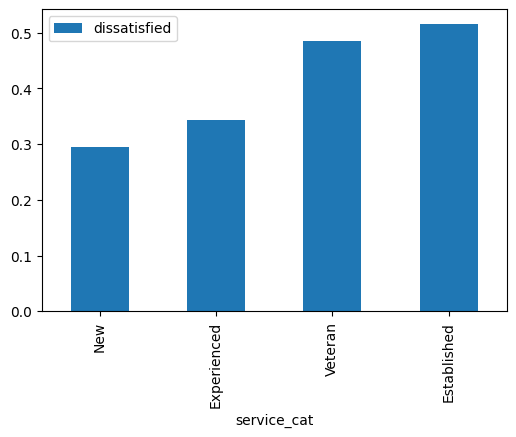

In [42]:
pv_table.plot(kind='bar')

We can see that most of the employees who resigned that were new at the company was not because they were dissatisfied.

For the other side, the `Established` group has the highest percentage of dissatisfaction with `51%`, followed by the veteran with `48%`. 

So, almost the `50%` of the people that quit, that belonged to the top 2 gropus of major labor experience, were inssatisfied.

## Amount of employees that resigned for dissatisfaction
Now lets see how many employees resigned due some kind of dissatisfaction.

             dissatisfied
service_cat              
Established          32.0
New                  57.0
Experienced          59.0
Veteran              66.0
AxesSubplot(0.125,0.125;0.775x0.755)


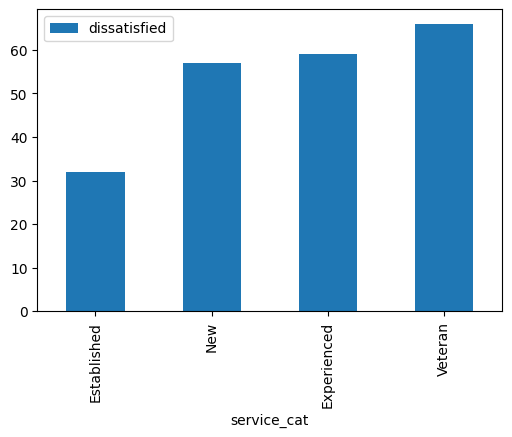

In [67]:
#Aggregate by the servide_cat column
pv_table2=combined_updated.pivot_table(index='service_cat',values='dissatisfied',aggfunc='sum').sort_values(by='dissatisfied')
print(pv_table2)
print(pv_table2.plot(kind='bar'))

The order of group changed a little, but it remains the `Experienced` and `Veterean` group at top. 
- `Veteran` had 66 resignation 
- `Experienced` had 59 resignations.


## Analyzing by age

Lets see if the `age` column needs some clean up.

In [46]:
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
31  35           32
26  30           32
56 or older      29
31-35            29
21-25            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

We have the same format as the years of service column. Lets clean it.

In [47]:
combined_updated['age']=combined_updated['age'].astype('str').str.extract(r"(\d+)").astype(np.float)
combined_updated['age']

<ipython-input-47-3e23f830548a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['age']=combined_updated['age'].astype('str').str.extract(r"(\d+)").astype(np.float)


0      36.0
1      41.0
2      31.0
3      46.0
4      31.0
       ... 
646    21.0
647    51.0
648     NaN
649    51.0
650    26.0
Name: age, Length: 651, dtype: float64

The range of ages is between 20 and 61. For this column 4 groups will be created as following:
- From 20 to 30 - Young
- From 30 to 40 - Youn-Adult
- From 40 to 50 - Adult
- From 50 or elder -Elderly
- Nan value remains

In [48]:
def edad(col):
    if pd.isnull(col):
        return np.nan
    elif 20<=col<30:
        return 'Young'
    elif  30<=col<40:
        return 'Young-Adult'
    elif 40<=col<50:
        return 'Adult'
    elif 50<=col:
        return 'Elderly'

In [49]:
#Create a new column to store the 4 age groups
combined_updated['age_cat']=combined_updated['age'].apply(edad)
combined_updated.head()

<ipython-input-49-363cb335063f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_updated['age_cat']=combined_updated['age'].apply(edad)


,id,separationtype,cease_date,position,employment_status,gender,age,institute_service,dissatisfied,institute,service_cat,age_cat
0,4.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,36.0,7.0,False,DETE,Established,Young-Adult
1,6.0,Resignation-Other reasons,2012.0,Guidance Officer,Permanent Full-time,Female,41.0,18.0,True,DETE,Veteran,Adult
2,9.0,Resignation-Other reasons,2012.0,Teacher,Permanent Full-time,Female,31.0,3.0,False,DETE,Experienced,Young-Adult
3,10.0,Resignation-Other employer,2012.0,Teacher Aide,Permanent Part-time,Female,46.0,15.0,True,DETE,Veteran,Adult
4,12.0,Resignation-Move overseas/interstate,2012.0,Teacher,Permanent Full-time,Male,31.0,3.0,False,DETE,Experienced,Young-Adult


             dissatisfied
age_cat                  
Adult            0.379310
Elderly          0.422819
Young            0.352518
Young-Adult      0.358209
AxesSubplot(0.125,0.125;0.775x0.755)


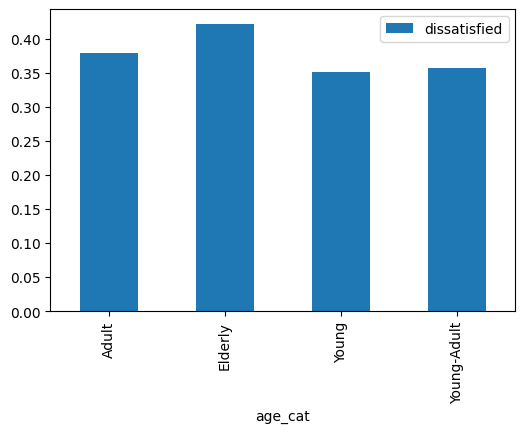

In [71]:
#Create a pivot table that analyze the amount of resignation per
pv_table3=combined_updated.pivot_table(index='age_cat',values='dissatisfied',aggfunc=np.mean)
print(pv_table3)
print(pv_table3.plot(kind='bar'))

As a mean, the `38%` of the resignations, for all the ages, had some type of dissatisfaction.

In [74]:
pv_table4=combined_updated.pivot_table(index=['institute','age_cat'],values='dissatisfied',aggfunc=np.mean)
pv_table4

dissatisfied
institute age_cat                  
DETE      Adult            0.466667
          Elderly          0.567901
          Young            0.446154
          Young-Adult      0.457143
TAFE      Adult            0.285714
          Elderly          0.250000
          Young            0.270270
          Young-Adult      0.250000

But if we analyze for each survey sepparately we can see that the numbers change significatly.

According `DETE` the `56%` of the Elderly people who resigned had some dissatisfaction.

For the other hand in the `TAFE`  survey, the gratest group with a dissatisfaction as the `Adult` group with `28%`.

Meanwhile, the other vategories for each survey are quite similar. 

For `DETE`, on average `45%` of the people that quit, for every category, had a dissatisfaction. While the `TAFE` survey has an average of 26%.


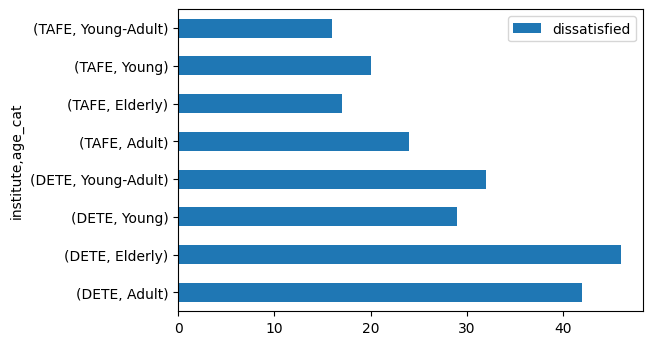

In [69]:
pv_table4.plot(kind='barh')

## Analyze by gender

Now lwts check if a gender is more dissatisfied than the other when they quit.

        dissatisfied
gender              
Female      0.370283
Male        0.398810
AxesSubplot(0.125,0.125;0.775x0.755)


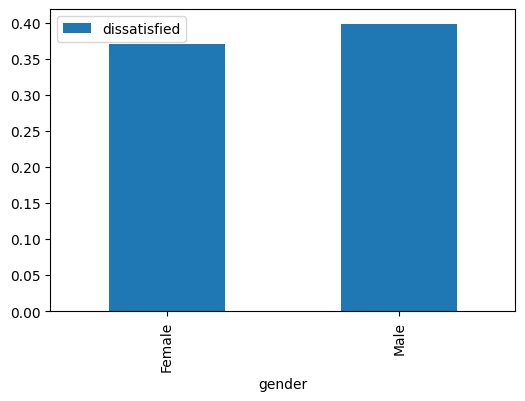

In [78]:
pv_table5=combined_updated.pivot_table(index='gender',values='dissatisfied',aggfunc=np.mean)
print(pv_table5)
print(pv_table5.plot(kind='bar'))

It is quite similar, the `37%` of females that quit has some dissatisfaction, while `40%` of men has some dissatisfaction.

So Gender does not look like something that influence in the dissatisfaction.

In [80]:
combined_updated['employment_status'].value_counts(dropna=False)

Permanent Full-time    256
Permanent Part-time    150
Temporary Full-time    120
NaN                     54
Temporary Part-time     37
Contract/casual         29
Casual                   5
Name: employment_status, dtype: int64

In [83]:
pv_table6=combined_updated.pivot_table(index='employment_status',values='dissatisfied',aggfunc=np.mean).sort_values(by='dissatisfied')
pv_table6

,dissatisfied
employment_status,
Temporary Part-time,0.162162
Contract/casual,0.172414
Casual,0.200000
Temporary Full-time,0.258333
Permanent Part-time,0.426667
Permanent Full-time,0.460938


There are more people who were in a part-time and full-time position who had some type of dissatisfaction than any other form of hiring